In [15]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [20]:
# settings for the plots,
dataset= 'mvtec_loco'
run= "contamination_0"  
experiment=  "Exp_17_02_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


In [17]:
# filepaths_0_break= [
#     '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-breakfast_box/args.log',
#     '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-breakfast_box/args.log',  
filepaths_0_break= [    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-breakfast_box/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-breakfast_box/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-breakfast_box/args.log', ]

# filepaths_0_screw_bag= [
#     '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-screw_bag/args.log',
#     '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-screw_bag/args.log',  
filepaths_0_screw_bag=['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-screw_bag/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-screw_bag/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-screw_bag/args.log', ]

filepaths_0_juice_box= [
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-juice_box/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-juice_box/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-juice_box/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-juice_box/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-juice_box/args.log', ]

filepaths_0_pushpins= [
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-pushpins/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-pushpins/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-pushpins/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-pushpins/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-pushpins/args.log', ]

filepaths_0_juice_bottle= [
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-juice_bottle/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-juice_bottle/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-juice_bottle/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-juice_bottle/args.log',
    '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-juice_bottle/args.log',]



['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


<Axes: xlabel='category', ylabel='image_AUC'>

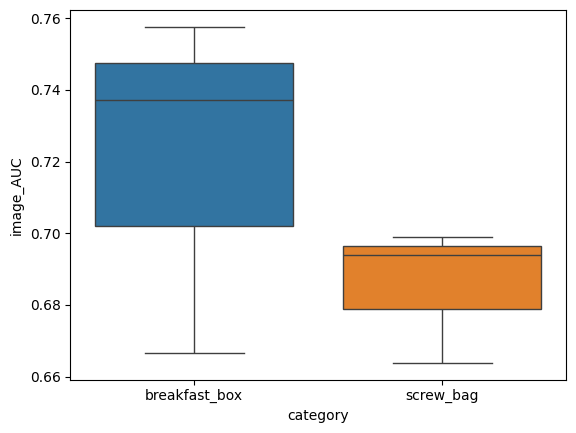

In [34]:
exp_name= "Exp_04_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

# category_list= list(conf_loco['anomaly_categories'].keys())
category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(3,6)

res_df=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
sns.boxplot(x="category", y="image_AUC",hue="category",data=res_df)

['juice_bottle', 'breakfast_box', 'screw_bag', 'pushpins', 'splicing_connectors']


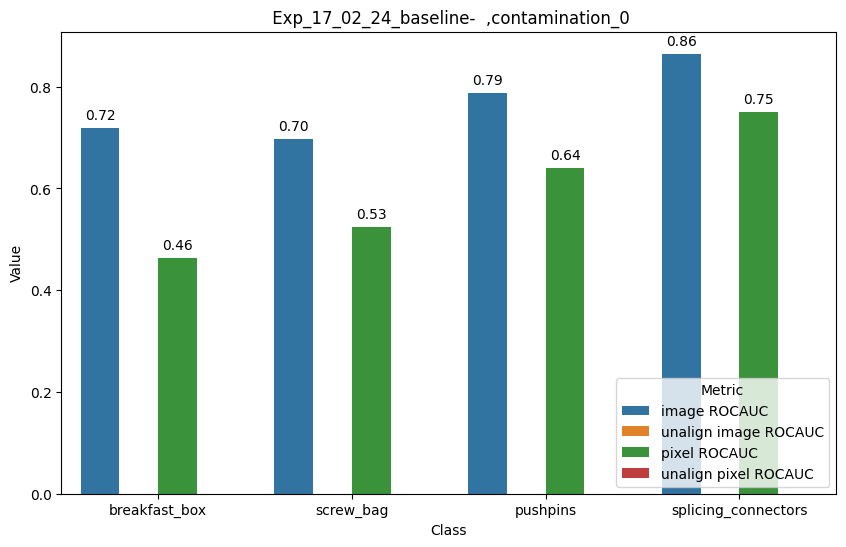

['juice_bottle', 'breakfast_box', 'screw_bag', 'pushpins', 'splicing_connectors']


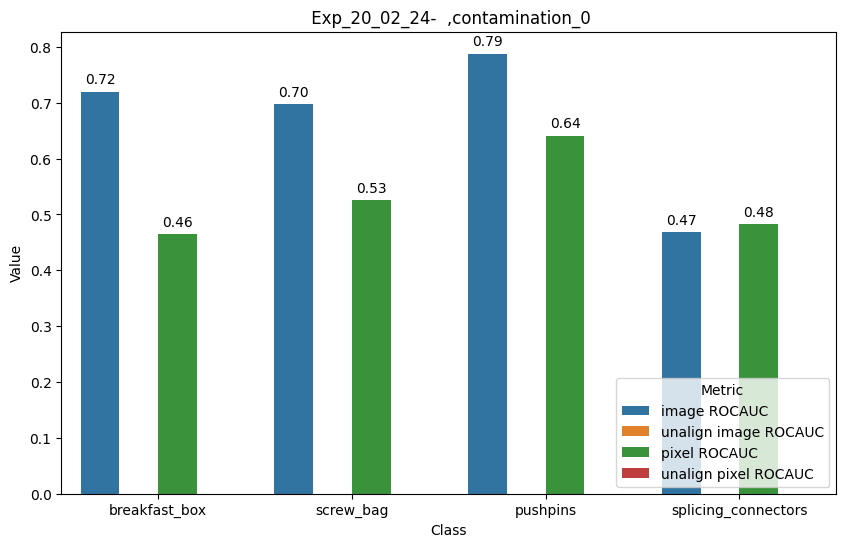

In [15]:
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_17_02_24_baseline-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_20_02_24-")

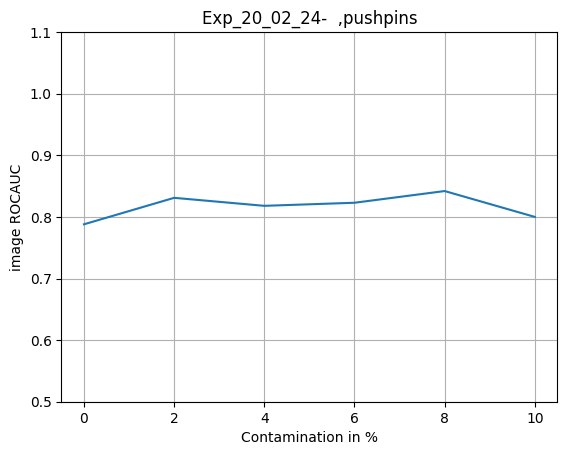

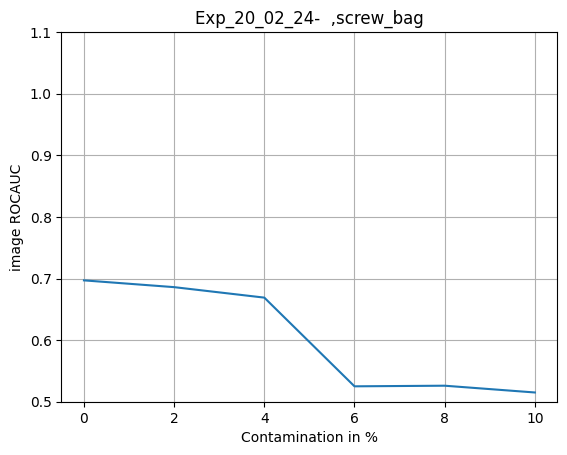

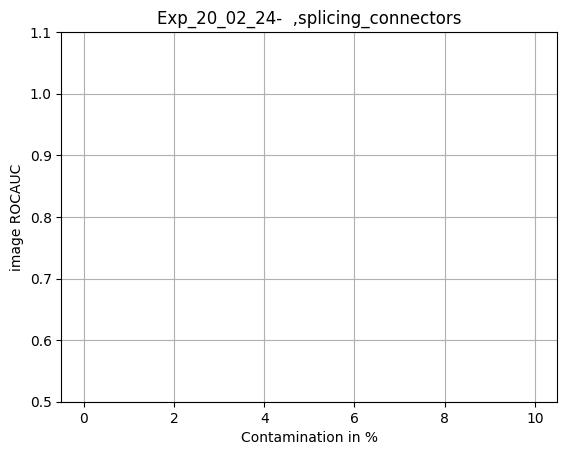

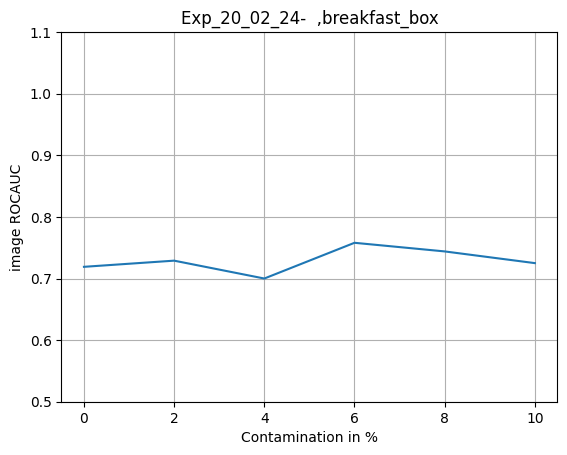

In [20]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
#plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="juice_bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="pushpins")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="screw_bag")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="splicing_connectors")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="breakfast_box")


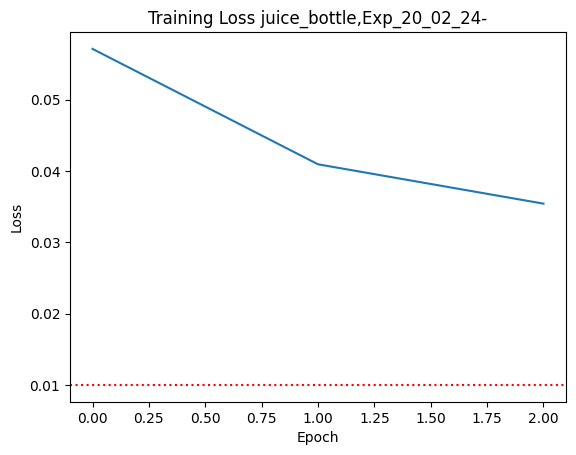

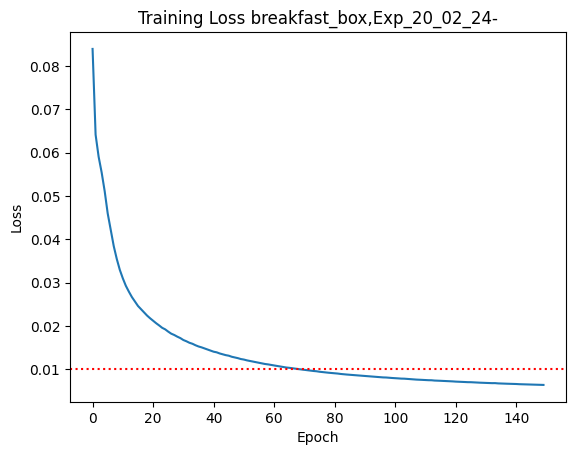

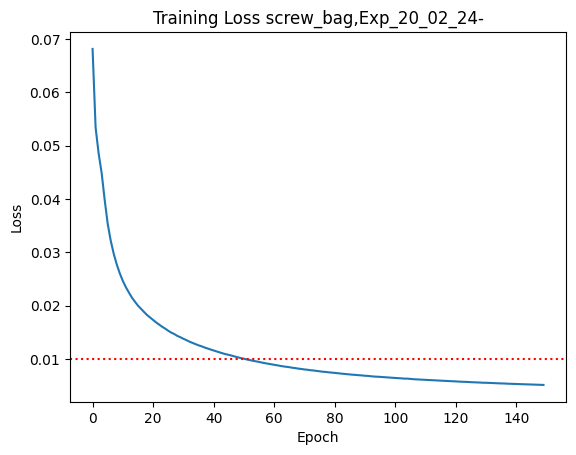

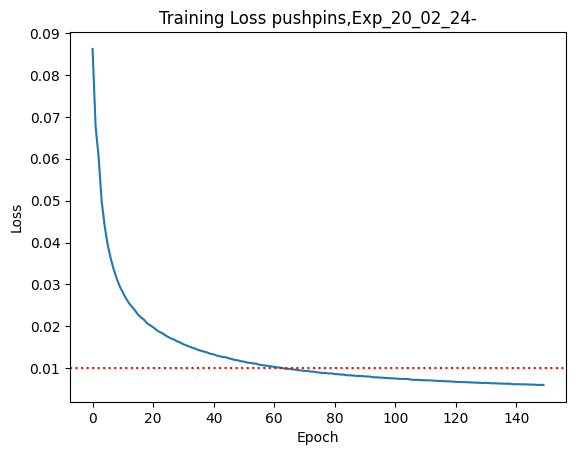

FileNotFoundError: [Errno 2] No such file or directory: 'results/mvtec_loco/contamination_0/Exp_20_02_24-splicing_connectors/args.log'

In [21]:
plot_losses(RESPATH,dataset='mvtec_loco',run="contamination_0",experiment="Exp_20_02_24-")